In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Choosing number of convolutional layers

In [40]:
from keras import layers
from keras import models

# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 3
model = [0] *nets

for j in range(3):
    model[j] = models.Sequential()
    model[j].add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model[j].add(layers.MaxPooling2D((2, 2)))
    if j>0:
        model[j].add(layers.Conv2D(64, (3, 3), activation='relu'))
        model[j].add(layers.MaxPooling2D((2, 2)))
    if j>1:
        model[j].add(layers.Conv2D(64, (3, 3), activation='relu'))
        model[j].add(layers.MaxPooling2D((2, 2)))
    model[j].add(layers.Flatten())
    model[j].add(layers.Dense(64, activation='relu'))
    model[j].add(layers.Dense(10, activation='softmax'))
    model[j].compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [42]:
# TRAIN NETWORKS
history = [0] * nets
names = ["One Conv layer","Two Conv layer","Three Conv layer"]
epochs = 20
for j in range(nets):
    history[j] = model[j].fit(train_images, train_labels, batch_size=80, epochs = epochs, 
        validation_data = (test_images, test_labels), verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN One Conv layer: Epochs=20, Train accuracy=0.99998, Validation accuracy=0.98690
CNN Two Conv layer: Epochs=20, Train accuracy=0.99953, Validation accuracy=0.99270
CNN Three Conv layer: Epochs=20, Train accuracy=0.99837, Validation accuracy=0.98870


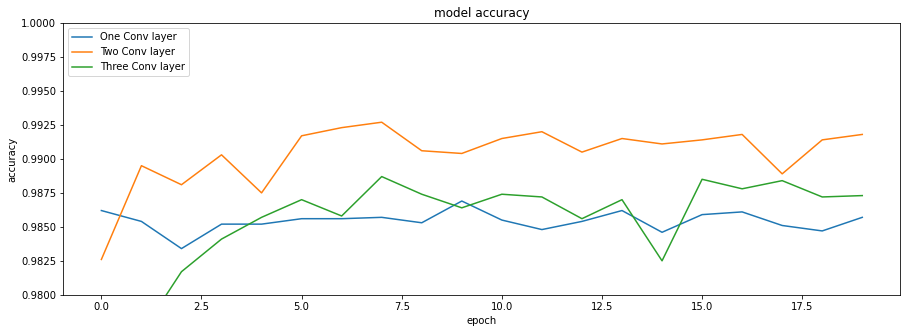

In [43]:
# PLOT ACCURACIES
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

So two convolutional layers yields better results.

## Choosing channel size

In [5]:
from keras import layers
from keras import models


# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 6
model = [0] *nets
for j in range(6):
    model[j] = models.Sequential()
    model[j].add(layers.Conv2D(j*8+8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model[j].add(layers.MaxPooling2D((2, 2)))
    model[j].add(layers.Conv2D(j*16+16, (3, 3), activation='relu'))
    model[j].add(layers.MaxPooling2D((2, 2)))
    model[j].add(layers.Flatten())
    model[j].add(layers.Dense(256, activation='relu'))
    model[j].add(layers.Dense(10, activation='softmax'))
    model[j].compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [6]:
# TRAIN NETWORKS
history = [0] * nets
names = ["8 maps","16 maps","24 maps","32 maps","48 maps","64 maps"]
epochs = 20
for j in range(nets):
    history[j] = model[j].fit(train_images, train_labels, batch_size=80, epochs = epochs, 
        validation_data = (test_images, test_labels), verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN 8 maps: Epochs=20, Train accuracy=0.99885, Validation accuracy=0.99220
CNN 16 maps: Epochs=20, Train accuracy=0.99943, Validation accuracy=0.99230
CNN 24 maps: Epochs=20, Train accuracy=0.99955, Validation accuracy=0.99260
CNN 32 maps: Epochs=20, Train accuracy=0.99968, Validation accuracy=0.99330
CNN 48 maps: Epochs=20, Train accuracy=0.99967, Validation accuracy=0.99350
CNN 64 maps: Epochs=20, Train accuracy=0.99968, Validation accuracy=0.99300


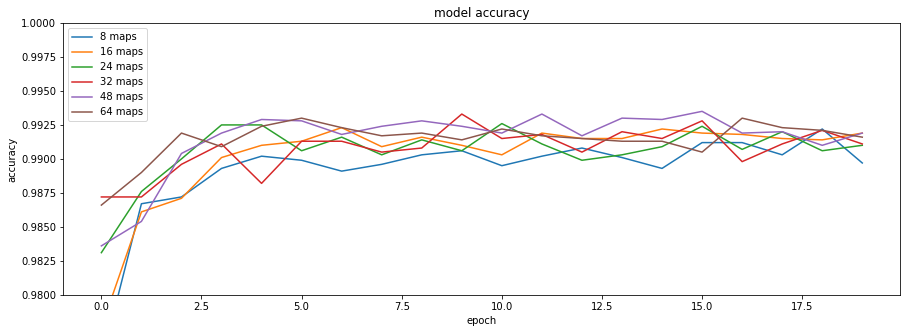

In [10]:
# PLOT ACCURACIES
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

We can see the best choice of channel for 2nd layer is 48 and after that it decreases. Hence for 1st layer 2×8+8 =24.

## Choosing dense layer

In [4]:
from keras import layers
from keras import models
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 8
model = [0] *nets

for j in range(8):
    model[j] = models.Sequential()
    model[j].add(layers.Conv2D(24, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model[j].add(layers.MaxPooling2D((2, 2)))
    model[j].add(layers.Conv2D(48, (3, 3), activation='relu'))
    model[j].add(layers.MaxPooling2D((2, 2)))
    model[j].add(layers.Flatten())
    if j>0:
        model[j].add(layers.Dense(2**(j+4), activation='relu'))
    model[j].add(layers.Dense(10, activation='softmax'))
    model[j].compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [5]:
# TRAIN NETWORKS
history = [0] * nets
names = ["0N","32N","64N","128N","256N","512N","1024N","2048N"]
epochs = 20
for j in range(nets):
    history[j] = model[j].fit(train_images, train_labels, batch_size=80, epochs = epochs, 
        validation_data = (test_images, test_labels), verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN 0N: Epochs=20, Train accuracy=0.99777, Validation accuracy=0.99200
CNN 32N: Epochs=20, Train accuracy=0.99892, Validation accuracy=0.99190
CNN 64N: Epochs=20, Train accuracy=0.99933, Validation accuracy=0.99250
CNN 128N: Epochs=20, Train accuracy=0.99952, Validation accuracy=0.99290
CNN 256N: Epochs=20, Train accuracy=0.99953, Validation accuracy=0.99240
CNN 512N: Epochs=20, Train accuracy=0.99970, Validation accuracy=0.99310
CNN 1024N: Epochs=20, Train accuracy=0.99980, Validation accuracy=0.99230
CNN 2048N: Epochs=20, Train accuracy=0.99967, Validation accuracy=0.99280


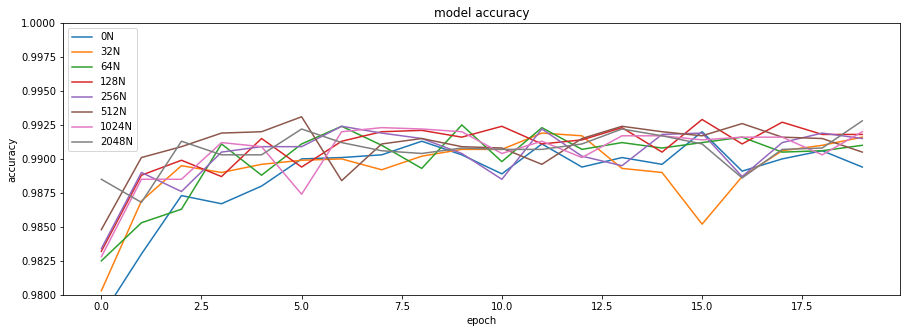

In [6]:
# PLOT ACCURACIES
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

We can see that 512 units has the highest but 128 units has better average performance. We will select 128 units.

## Choosing dropout percentage

In [4]:
from keras import layers
from keras import models
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 8
model = [0] *nets

for j in range(8):
    model[j] = models.Sequential()
    model[j].add(layers.Conv2D(24, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model[j].add(layers.MaxPooling2D((2, 2)))
    model[j].add(layers.Dropout(j*0.1))
    model[j].add(layers.Conv2D(48, (3, 3), activation='relu'))
    model[j].add(layers.MaxPooling2D((2, 2)))
    model[j].add(layers.Dropout(j*0.1))
    model[j].add(layers.Flatten())
    model[j].add(layers.Dense(128, activation='relu'))
    model[j].add(layers.Dropout(j*0.1))
    model[j].add(layers.Dense(10, activation='softmax'))
    model[j].compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [5]:
# TRAIN NETWORKS
history = [0] * nets
names = ["D=0","D=0.1","D=0.2","D=0.3","D=0.4","D=0.5","D=0.6","D=0.7"]
epochs = 30
for j in range(nets):
    history[j] = model[j].fit(train_images, train_labels, batch_size=80, epochs = epochs, 
        validation_data = (test_images, test_labels), verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN D=0: Epochs=30, Train accuracy=0.99972, Validation accuracy=0.99300
CNN D=0.1: Epochs=30, Train accuracy=0.99617, Validation accuracy=0.99270
CNN D=0.2: Epochs=30, Train accuracy=0.99108, Validation accuracy=0.99300
CNN D=0.3: Epochs=30, Train accuracy=0.98682, Validation accuracy=0.99350
CNN D=0.4: Epochs=30, Train accuracy=0.98113, Validation accuracy=0.99180
CNN D=0.5: Epochs=30, Train accuracy=0.97090, Validation accuracy=0.98860
CNN D=0.6: Epochs=30, Train accuracy=0.95503, Validation accuracy=0.98500
CNN D=0.7: Epochs=30, Train accuracy=0.92377, Validation accuracy=0.97390


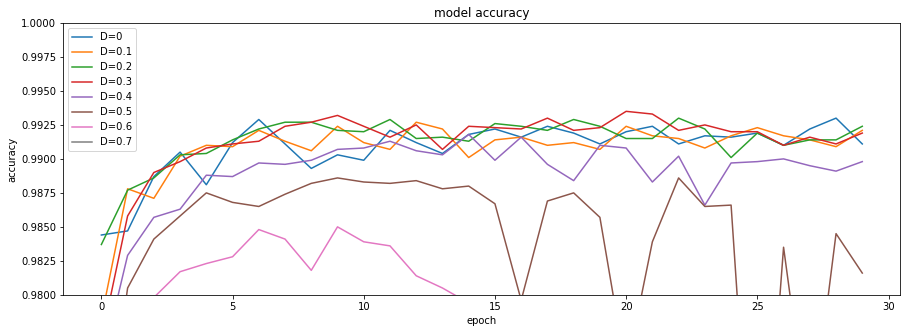

In [9]:
import matplotlib.pyplot as plt
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

We can see a 0.3% dropout yields better results.

## Choosing advanced feature

In [14]:
from keras.layers.normalization import BatchNormalization
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 5
model = [0] *nets

j=0
#5x5 feature map
model[j] = models.Sequential()
model[j].add(layers.Conv2D(24, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model[j].add(layers.MaxPooling2D((2, 2)))
model[j].add(layers.Dropout(0.3))

model[j].add(layers.Conv2D(48, (5, 5), activation='relu'))
model[j].add(layers.MaxPooling2D((2, 2)))
model[j].add(layers.Dropout(0.3))

model[j].add(layers.Flatten())
model[j].add(layers.Dense(128, activation='relu'))
model[j].add(layers.Dropout(0.3))
model[j].add(layers.Dense(10, activation='softmax'))

model[j].compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

j=1
#Instead of using one convolution layer of size 5x5, mimiced 5x5 by using two consecutive 3x3 layers
model[j] = models.Sequential()
model[j].add(layers.Conv2D(24, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model[j].add(layers.Conv2D(24, (3, 3), activation='relu'))
model[j].add(layers.MaxPooling2D((2, 2)))
model[j].add(layers.Dropout(0.3))

model[j].add(layers.Conv2D(48, (3, 3), activation='relu'))
model[j].add(layers.Conv2D(48, (3, 3), activation='relu'))
model[j].add(layers.MaxPooling2D((2, 2)))
model[j].add(layers.Dropout(0.3))


model[j].add(layers.Flatten())
model[j].add(layers.Dense(128, activation='relu'))
model[j].add(layers.Dropout(0.3))
model[j].add(layers.Dense(10, activation='softmax'))

model[j].compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

j=2
#Instead of max-pooling used strides to downsample by a factor of 2, used padding to have output as a same spatial dimension- 
#as input
model[j] = models.Sequential()
model[j].add(layers.Conv2D(24, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model[j].add(layers.Conv2D(24, (5, 5), strides=2, padding='same', activation='relu'))
model[j].add(layers.Dropout(0.3))

model[j].add(layers.Conv2D(48, (5, 5), activation='relu'))
model[j].add(layers.Conv2D(48, (5, 5), strides=2, padding='same', activation='relu'))
model[j].add(layers.Dropout(0.3))

model[j].add(layers.Flatten())
model[j].add(layers.Dense(128, activation='relu'))
model[j].add(layers.Dropout(0.3))
model[j].add(layers.Dense(10, activation='softmax'))

model[j].compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

j=3
#used batch normalization
model[j] = models.Sequential()
model[j].add(layers.Conv2D(24, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model[j].add(BatchNormalization())
model[j].add(layers.Conv2D(24, (3, 3), activation='relu'))
model[j].add(BatchNormalization())
model[j].add(layers.Conv2D(24, (5, 5), strides=2, padding='same', activation='relu'))
model[j].add(BatchNormalization())
model[j].add(layers.Dropout(0.3))

model[j].add(layers.Conv2D(48, (3, 3), activation='relu'))
model[j].add(BatchNormalization())
model[j].add(layers.Conv2D(48, (3, 3), activation='relu'))
model[j].add(BatchNormalization())
model[j].add(layers.Conv2D(48, (5, 5), strides=2, padding='same', activation='relu'))
model[j].add(BatchNormalization())
model[j].add(layers.Dropout(0.3))

model[j].add(layers.Flatten())
model[j].add(layers.Dense(128, activation='relu'))
model[j].add(layers.Dropout(0.3))
model[j].add(layers.Dense(10, activation='softmax'))

model[j].compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [15]:
j=4
#for data augmentation
model[j] = models.Sequential()
model[j].add(layers.Conv2D(24, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model[j].add(BatchNormalization())
model[j].add(layers.Conv2D(24, (3, 3), activation='relu'))
model[j].add(BatchNormalization())
model[j].add(layers.Conv2D(24, (5, 5), strides=2, padding='same', activation='relu'))
model[j].add(BatchNormalization())
model[j].add(layers.Dropout(0.3))

model[j].add(layers.Conv2D(48, (3, 3), activation='relu'))
model[j].add(BatchNormalization())
model[j].add(layers.Conv2D(48, (3, 3), activation='relu'))
model[j].add(BatchNormalization())
model[j].add(layers.Conv2D(48, (5, 5), strides=2, padding='same', activation='relu'))
model[j].add(BatchNormalization())
model[j].add(layers.Dropout(0.3))

model[j].add(layers.Flatten())
model[j].add(layers.Dense(128, activation='relu'))
model[j].add(layers.Dropout(0.3))
model[j].add(layers.Dense(10, activation='softmax'))

model[j].compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [19]:
# TRAIN NETWORKS 1,2,3,4
history = [0] * nets
names = ["basic","two consecutive 3x3 layers","strides","both+BN","both+BN+DA"]
epochs = 35
for j in range(nets-1):
    history[j] = model[j].fit(train_images, train_labels, batch_size=64, epochs = epochs,  
        validation_data = (test_images, test_labels), verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))
    
# CREATE MORE TRAINING IMAGES VIA DATA AUGMENTATION
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1)
# TRAIN NETWORK 5
j = nets-1
history[j] = model[j].fit_generator(datagen.flow(train_images, train_labels, batch_size=64), 
    epochs = epochs, steps_per_epoch = train_images.shape[0]//64,
    validation_data = (test_images, test_labels), verbose=0)
print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
    names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN basic: Epochs=35, Train accuracy=0.97745, Validation accuracy=0.99250
CNN two consecutive 3x3 layers: Epochs=35, Train accuracy=0.97645, Validation accuracy=0.99140
CNN strides: Epochs=35, Train accuracy=0.96770, Validation accuracy=0.98660
CNN both+BN: Epochs=35, Train accuracy=0.99927, Validation accuracy=0.99560
CNN both+BN+DA: Epochs=35, Train accuracy=0.99189, Validation accuracy=0.99630


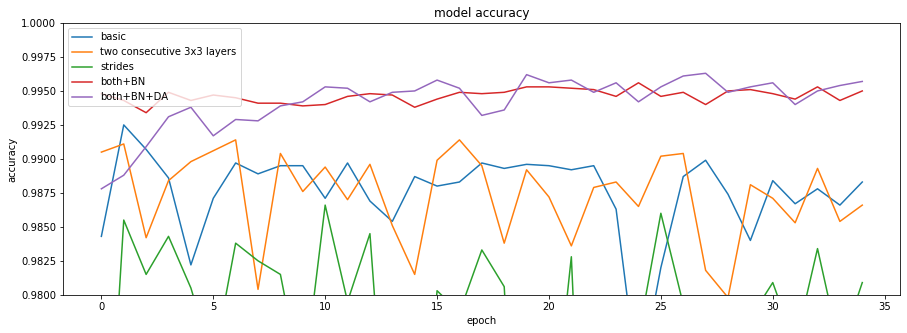

In [20]:
import matplotlib.pyplot as plt
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

As we can see, the use of two 5x5 feature maps (for one two 3x3 replacement) with batchnormalization and data augmentation results highest accuracy.